In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy

##### Parameters

In [17]:
#Parameters
srate = 1024
nyquist = srate / 2
frange = [20,45] # Passband range (the filter designed to pass frequencies btw 20 Hz and 45 Hz)
transw = 0.1 # Transition width as a fraction passband frequency
order = int(5 * srate / frange[0]) # based on lowest passband freq

if order % 2 == 0:
    order += 1

shape = [0, 0, 1, 1, 0, 0] # attenuate unwanted freqs
frex = [0, frange[0] - frange[0]*transw, frange[0], frange[1], frange[1] + frange[1]*transw, nyquist]

##### filter kernel


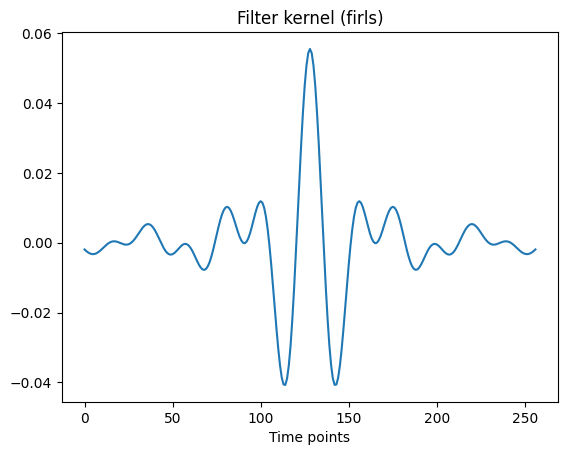

In [18]:
filtker = signal.firls(order, frex, shape, fs=srate)

#show implulse response of filter
plt.plot(filtker)
plt.xlabel("Time points")
plt.title("Filter kernel (firls)")
plt.show()

#### Frequency response analysis


In [19]:
filtpow = np.abs(scipy.fftpack.fft(filtker))**2
hz = np.linspace(0, srate/2, int(np.floor(len(filtker) /2) + 1 ))
filtpow = filtpow[0:len(hz)] #only positive freqs are kept

#### Plotting the frequency response

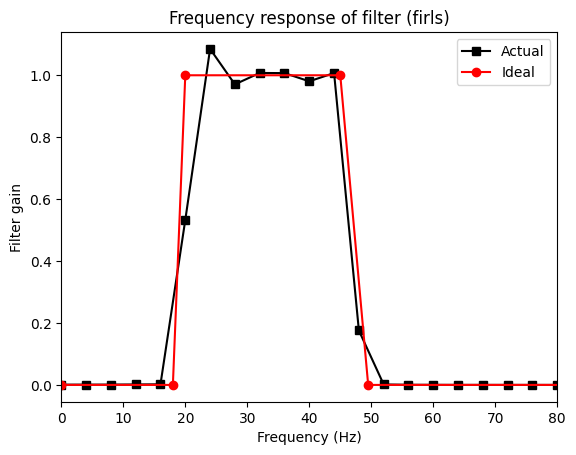

In [20]:
plt.plot(hz, filtpow, 'ks-', label='Actual')
plt.plot(frex, shape, 'ro-', label='Ideal')
plt.xlim([0, frange[0] * 4])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.legend()
plt.title('Frequency response of filter (firls)')
plt.show()

#### Logarithmic scale plot

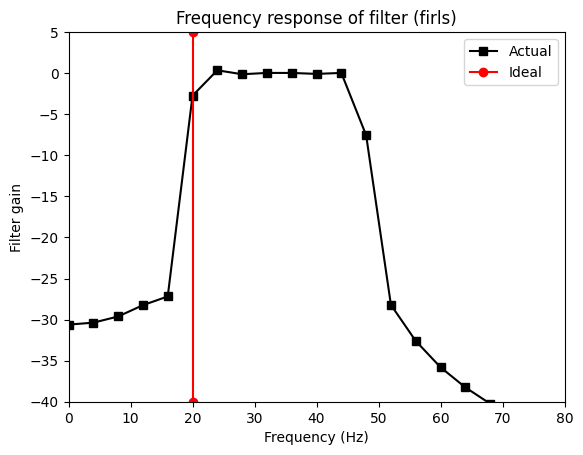

In [21]:
plt.plot(hz, 10 * np.log10(filtpow), 'ks-', label='Actual')
plt.plot([frange[0], frange[0]], [-40, 5], 'ro-', label='Ideal')
plt.xlim([0, frange[0] * 4])
plt.ylim([-40, 5])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.legend()
plt.title('Frequency response of filter (firls)')
plt.show()

### Effect of filter order

In [22]:
#Varying the filter order
orderF = (1 * srate / frange[0]) / (srate/1000)
orderL = (15 * srate / frange[0]) / (srate / 1000)
orders = np.round(np.linspace(orderF, orderL, 10)) #generate 10 evenly spaced values btw orderF and orderL and then round them

#### Computing and plotting different filter kernels

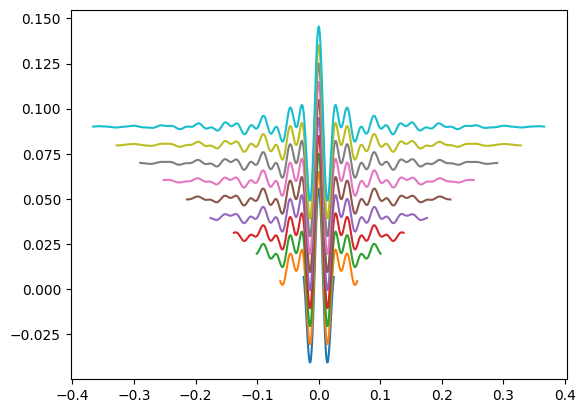

In [25]:
import scipy.fftpack


fkernX = np.zeros((len(orders), 1000))
hz = np.linspace(0,srate, 1000)

for oi in range(len(orders)):
    ord2use = orders[oi] + (1- orders[oi] % 2) #if odd it will be orders[oi] + 1
    fkern = signal.firls(ord2use, frex, shape, fs=srate)
    fkernX[oi, :] = np.abs(scipy.fftpack.fft(fkern, 1000))**2

    time = np.arange(0, ord2use) / srate
    time = time - np.mean(time)
    plt.plot(time, fkern + 0.01 * oi)

##### Freq Response for different orders

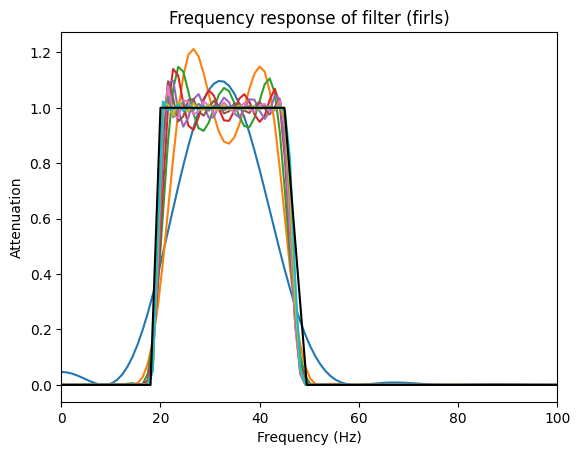

In [26]:
plt.plot(hz, fkernX.T)
plt.plot(frex, shape, 'k')
plt.xlim([0, 100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (firls)')
plt.show()
